<p>
<img src="./imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">

# **Procesamiento de imágenes**

## **Histograma**

La función `calcHist` en OpenCV se utiliza para calcular el histograma de una imagen. Un histograma es una representación gráfica de la distribución de intensidades de píxeles en una imagen. Es una herramienta útil para el análisis de imágenes, ya que puede ayudar a comprender la distribución de brillo y contraste, entre otros aspectos.

Los parámetros de la función `calcHist` son los siguientes:

```python
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

- `images`: Este es el conjunto de imágenes para el cual se calculan los histogramas. Deben estar en formato de lista, por ejemplo `[image]`.

- `channels`: Es una lista de índices, donde cada índice corresponde a un canal para el cual se calculará el histograma. Por ejemplo, si quieres calcular el histograma de una imagen en escala de grises, pasarías `[0]`. Para una imagen BGR, pasarías `[0]`, `[1]` o `[2]` para calcular el histograma de los canales azul, verde o rojo respectivamente.

- `mask`: Una imagen de máscara para calcular el histograma de una región específica de la imagen. Si quieres calcular el histograma de toda la imagen, este parámetro debería ser `None`.

- `histSize`: Este parámetro representa el número de bins en el histograma. Por ejemplo, `[256]` indica que el histograma debe tener 256 bins.

- `ranges`: Es el rango de valores posibles de los píxeles. Para imágenes en escala de grises, este rango es generalmente `[0, 255]` (para abarcar todos los posibles valores de 8 bits).

- `hist`: Es el resultado, el histograma calculado.

- `accumulate`: Un flag que indica si el histograma se debe acumular. Si es `False`, el histograma se limpia al principio de la llamada.

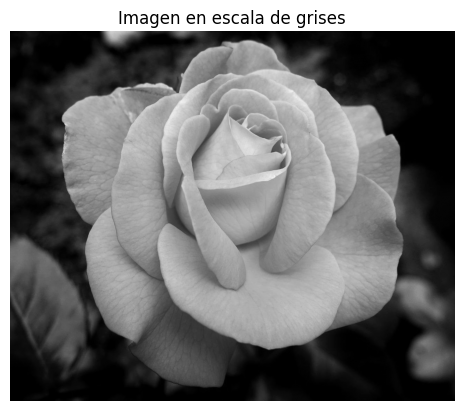

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("flor.jpeg")
image_BW = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_BW, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis('off')

plt.show()

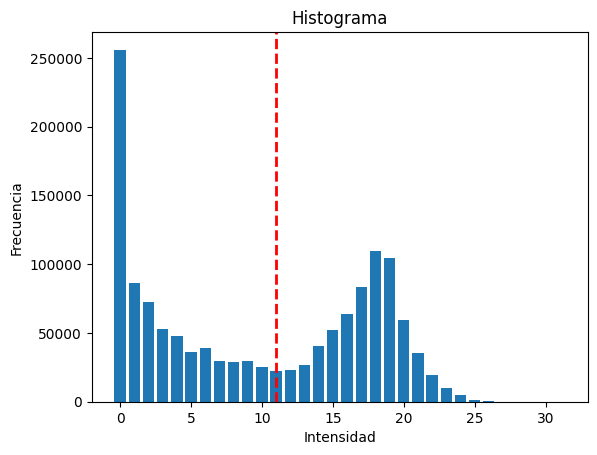

In [13]:
# Histogram
bins = 32
hist = cv2.calcHist([image_BW], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])
plt.title("Histograma")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

umbral = 11  # Índice del bin donde quieres la línea
plt.axvline(x=umbral, color='red', linestyle='--', linewidth=2, label=f'Umbral = {umbral}')

plt.show()

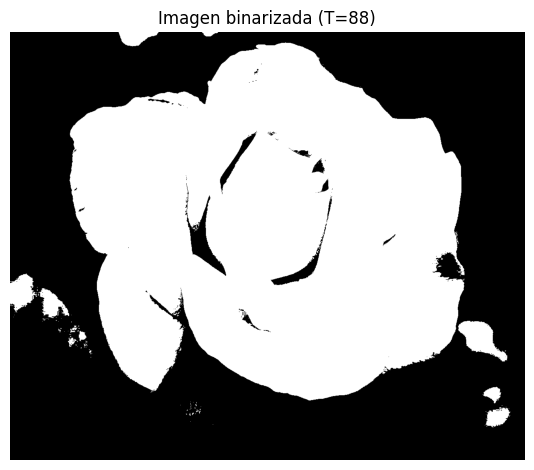

In [15]:
# --- Binarización ---
# Umbral manual: píxeles >= T -> blancos (255), el resto negros (0)

T = 88  # Ajusta este valor según necesites
_, image_bin = cv2.threshold(image_BW, T, 255, cv2.THRESH_BINARY)

plt.imshow(image_bin, cmap='gray')
plt.title(f"Imagen binarizada (T={T})")
plt.axis('off')

plt.tight_layout()
plt.show()

## **Zonas de movimiento**

Podemos detectar en qué zonas de la imagen hay cambios mediante la substracción de imágenes (imagen actual - imagen de fondo).

|<img src="imgs/frame1.jpg">|<img src="imgs/frame2.jpg">|
|--|--|




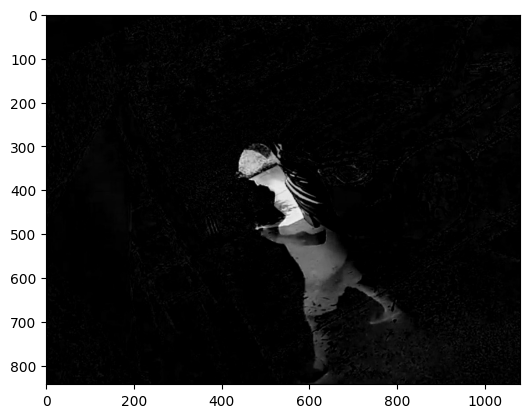

In [20]:
import cv2
import numpy as np
   
# path to input images are specified and 
# images are loaded with imread command
# Load grayscale images
image1 = cv2.imread('imgs/frame1.jpg', 0)
image2 = cv2.imread('imgs/frame2.jpg', 0)
 
sub = cv2.subtract(image1, image2)
 
# plt.imshow(image1, cmap='gray')
plt.imshow(sub, cmap='gray')

<BarContainer object of 32 artists>

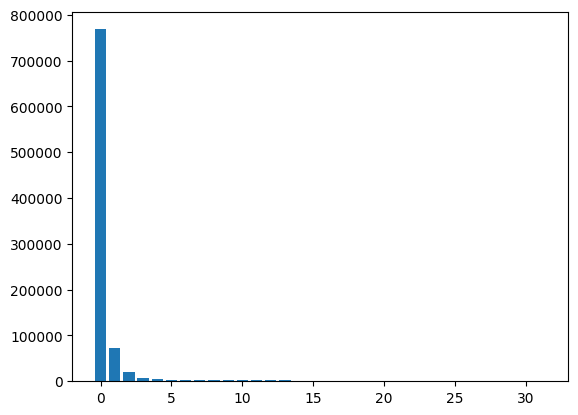

In [25]:
bins = 32
hist = cv2.calcHist([sub], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])

## **Umbralizado**

El umbralizado de imágenes es una técnica que se utiliza para separar objetos dentro de una imagen en función de la intensidad de los píxeles. En términos simples, se trata de convertir una imagen en escala de grises a una imagen binaria, donde los píxeles pueden tener uno de dos valores posibles, generalmente 0 o 255 (blanco o negro).

### **¿Cómo Funciona?**

1. **Selección de un Umbral**: El primer paso en el umbralizado es seleccionar un valor de umbral. Este umbral determinará cómo se clasifican los píxeles.

2. **Aplicación del Umbral**: Después de seleccionar un valor de umbral, se aplica a cada píxel de la imagen de la siguiente manera:
   - Si la intensidad del píxel es menor (o menor o igual, dependiendo de la implementación) que el valor de umbral, el píxel se establece en negro (intensidad 0).
   - Si la intensidad del píxel es mayor que el valor de umbral, el píxel se establece en blanco (intensidad 255).

### **Aplicaciones**

El umbralizado se utiliza en una variedad de aplicaciones, como:
- Separación de objetos del fondo.
- Preprocesamiento antes de la segmentación de imágenes.
- Reducción de la complejidad visual para aumentar el rendimiento de los algoritmos de visión por computador.
- Extracción de características relevantes de una imagen.

En OpenCV, puedes utilizar la función `cv2.threshold` para aplicar umbralizado a una imagen.

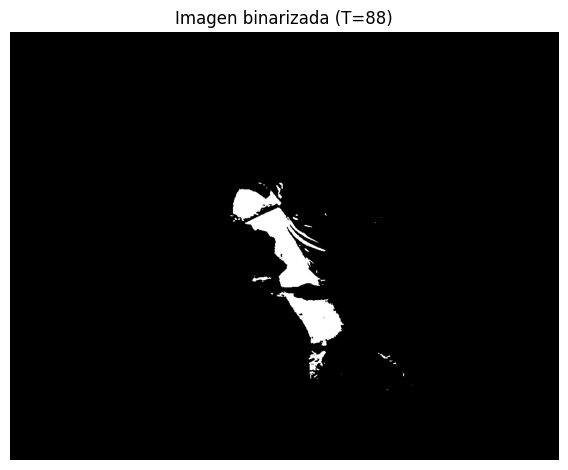

In [28]:
# --- Binarización ---
# Umbral manual: píxeles >= T -> blancos (255), el resto negros (0)

T = 88  # Ajusta este valor según necesites
_, image_bin = cv2.threshold(sub, T, 255, cv2.THRESH_BINARY)

plt.imshow(image_bin, cmap='gray')
plt.title(f"Imagen binarizada (T={T})")
plt.axis('off')

plt.tight_layout()
plt.show()


## **Detección de blobs**

La detección de blobs (Blob Detection) es una técnica clásica en visión por computador que permite identificar y analizar regiones en una imagen que son coherentes en cuanto a ciertas características como intensidad, color, textura o forma.

El término blob proviene de Binary Large Object, pero en visión por computador se refiere a una región compacta de píxeles conectados que se percibe como una sola entidad u objeto.

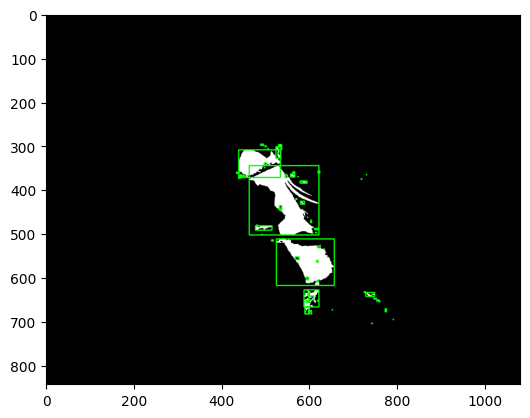

In [30]:
# find the contours
contours, _ = cv2.findContours(image_bin, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(cnt)
    # draw a green rectangle to visualize the bounding rect
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')

### **Filtrado por tamaño del blob**

En este paso vamos a filtrar los blobs en función de su tamaño, con el objetivo de quedarnos únicamente con las regiones u objetos relevantes en la imagen. Los blobs más pequeños suelen corresponder a ruido, imperfecciones o detalles irrelevantes, por lo que serán descartados durante el proceso.

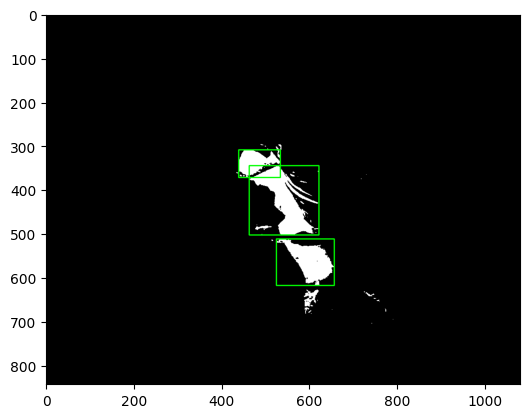

In [36]:
img = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(cnt)
    # draw a green rectangle to visualize the bounding rect
    if cv2.contourArea(cnt) > 1500:  # Filter by size
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')

-----

### **Ejercicios**

1. Lee y visualiza el vídeo `carretera.mp4`.
2. Promedia las imágenes del vídeo para obtener un fondo sin coches.
3. Resta el fondo a cada imagen del vídeo.
4. Umbraliza la imagen resultante para quedarte únicamente con las zonas donde hay diferencias significativas en el valor de los píxeles.
5. Detecta los blobs que correspondan a coches, ten en cuenta que los coches son más grandes que el ruido.

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt



In [5]:
#1. Leer y visualizar el video carretera.mp4
import cv2
import numpy as np 
import matplotlib.pyplot as plt
cap = cv2.VideoCapture('trafico01.mp4')
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    cv2.imshow('Vídeo carretera', frame)
    cv2.waitKey(25)
cap.release()
cv2.destroyAllWindows()

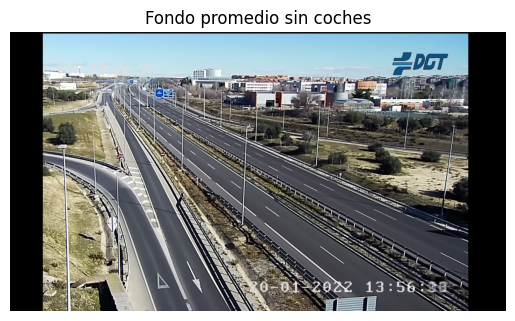

In [6]:
#2. Promediar las imagenes para obtener un fondo sin coches


frames_np = np.array(frames, dtype=np.float32)

fondo_promedio = np.mean(frames_np, axis=0)

fondo_promedio_uint8 = fondo_promedio.astype(np.uint8)

# Mostrar el fondo promedio
plt.imshow(cv2.cvtColor(fondo_promedio_uint8, cv2.COLOR_BGR2RGB))
plt.title("Fondo promedio sin coches")
plt.axis('off')
plt.show()


In [7]:
#Pasos 3 y 4
T = 50  # Umbral de binarización
fondo_uint8 = fondo_promedio.astype(np.uint8)

alto, ancho = frames[0].shape[:2]

# Crear objeto VideoWriter (nombre archivo, codec, fps, tamaño)
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec común para .avi
fps = 30  # Frames por segundo
video_salida = cv2.VideoWriter('video_resultado.avi', fourcc, fps, (ancho, alto), isColor=False)

for i, frame in enumerate(frames):
    #3. Resta el fondo a cada imagen del vídeo.

    sub = cv2.absdiff(frame, fondo_uint8)

    #4. Umbraliza la imagen resultante para quedarte únicamente con las zonas donde hay diferencias significativas en el valor de los píxeles.
    _, image_bin = cv2.threshold(sub, T, 255, cv2.THRESH_BINARY)

    if len(image_bin.shape) == 3:
        image_bin = cv2.cvtColor(image_bin, cv2.COLOR_BGR2GRAY)

    video_salida.write(image_bin)

video_salida.release()
print("Vídeo resultante guardado como 'video_resultado.avi'")


Vídeo resultante guardado como 'video_resultado.avi'


In [8]:
# 5. Detecta los blobs que correspondan a coches, ten en cuenta que los coches son más grandes que el ruido.

T = 50  # Umbral de binarización
fondo_uint8 = fondo_promedio.astype(np.uint8)

alto, ancho = frames[0].shape[:2]

# Crear objeto VideoWriter para video umbralizado (blobs sin rectángulos)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
video_salida = cv2.VideoWriter('video_resultado.avi', fourcc, fps, (ancho, alto), isColor=False)

# Crear objeto VideoWriter para video con rectángulos (detección coches)
video_con_blob = cv2.VideoWriter('video_coches_detectados.avi', fourcc, fps, (ancho, alto), isColor=True)

min_area = 3000  # Área mínima para filtrar blobs pequeños
min_ratio = 1.2  # Relación de aspecto mínima (ancho/alto)
max_ratio = 4.0  # Relación de aspecto máxima

for i, frame in enumerate(frames):
    # Paso 3: resta el fondo
    sub = cv2.absdiff(frame, fondo_uint8)

    # Paso 4: umbralización
    _, image_bin = cv2.threshold(sub, T, 255, cv2.THRESH_BINARY)

    if len(image_bin.shape) == 3:
        image_bin = cv2.cvtColor(image_bin, cv2.COLOR_BGR2GRAY)

    # Guardar frame umbralizado en video (blanco y negro)
    video_salida.write(image_bin)

    # Paso 5: detección de blobs (contornos)
    contours, _ = cv2.findContours(image_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_color = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(cnt)
            ratio = w / float(h)
            if min_ratio < ratio < max_ratio:
                cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Guardar frame con rectángulos en video
    video_con_blob.write(img_color)

video_salida.release()
video_con_blob.release()

print("Vídeo umbralizado guardado como 'video_resultado.avi'")
print("Vídeo con detección de coches guardado como 'video_coches_detectados.avi'")


Vídeo umbralizado guardado como 'video_resultado.avi'
Vídeo con detección de coches guardado como 'video_coches_detectados.avi'


In [27]:
import cv2
import numpy as np

T = 50  # Umbral de binarización
fondo_uint8 = fondo_promedio.astype(np.uint8)

alto, ancho = frames[0].shape[:2]

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
video_salida = cv2.VideoWriter('video_resultado.avi', fourcc, fps, (ancho, alto), isColor=False)
video_con_blob = cv2.VideoWriter('video_coches_detectados.avi', fourcc, fps, (ancho, alto), isColor=True)

min_area = 3000
min_ratio = 1.2
max_ratio = 4.0

line_position = int(alto * 0.75)  # Posición vertical de la línea en el frame (75% de la altura)
offset = 10  # Margen para detectar el cruce

car_count = 0
centroides_anteriores = []

def calcular_centroid(x, y, w, h):
    return (int(x + w / 2), int(y + h / 2))

def centroids_cercanos(c1, c2, threshold=50):
    return abs(c1[0] - c2[0]) < threshold and abs(c1[1] - c2[1]) < threshold

for i, frame in enumerate(frames):
    sub = cv2.absdiff(frame, fondo_uint8)
    _, image_bin = cv2.threshold(sub, T, 255, cv2.THRESH_BINARY)
    if len(image_bin.shape) == 3:
        image_bin = cv2.cvtColor(image_bin, cv2.COLOR_BGR2GRAY)

    video_salida.write(image_bin)

    contours, _ = cv2.findContours(image_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_color = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

    centroides_actuales = []

    # Dibujar línea para conteo
    cv2.line(img_color, (0, line_position), (ancho, line_position), (255, 0, 0), 2)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(cnt)
            ratio = w / float(h)
            if min_ratio < ratio < max_ratio:
                cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)
                centroid = calcular_centroid(x, y, w, h)
                centroides_actuales.append(centroid)
                cv2.circle(img_color, centroid, 5, (0, 0, 255), -1)

    # Verificar cruces de línea para contar coches
    for centroid in centroides_actuales:
        if (line_position - offset) < centroid[1] < (line_position + offset):
            for c_ant in centroides_anteriores:
                if centroids_cercanos(centroid, c_ant):
                    break
            else:
                car_count += 1

    # Actualizar lista de centroides anteriores
    centroides_anteriores = centroides_actuales.copy()

    # Mostrar conteo en la imagen
    cv2.putText(img_color, f'Coches: {car_count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    video_con_blob.write(img_color)

video_salida.release()
video_con_blob.release()

print("Vídeo umbralizado guardado como 'video_resultado.avi'")
print("Vídeo con detección y conteo de coches guardado como 'video_coches_detectados.avi'")


Vídeo umbralizado guardado como 'video_resultado.avi'
Vídeo con detección y conteo de coches guardado como 'video_coches_detectados.avi'
